This notebook contains examples to plot heatmaps (it uses the method heatmap provided by the seaborn library)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

%matplotlib inline

Lets generate a very simple dataset with few classes

In [3]:
num_classes = 6
X, y = make_classification(n_samples=400, n_features=3,
                           n_classes=num_classes, n_informative=3, n_redundant=0, n_repeated=0,
                          class_sep=1.15, n_clusters_per_class=1)

Now we build a basic estimator (SVM), train and evaluate it

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, stratify=y)

In [11]:
model = SVC(C=1.25, gamma='scale')
model.fit(X_train, y_train)

SVC(C=1.25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

The important part now. We are going to create a heatmap to show the confussion matrix of the predictions on train & test sets made by the classifier

In [34]:
confusion_matrix(y_train, y_train_pred)

array([[51,  1,  1,  0,  0,  1],
       [ 4, 47,  0,  1,  1,  1],
       [ 2,  2, 45,  3,  1,  1],
       [ 0,  0,  2, 48,  3,  0],
       [ 0,  0,  1,  3, 49,  0],
       [ 1,  1,  3,  0,  2, 45]])

Text(42.0, 0.5, 'Real class')

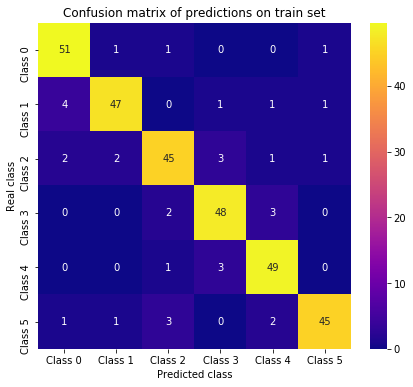

In [35]:
labels = ['Class {}'.format(i) for i in range(0, num_classes)]
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
            cmap='plasma', robust=True, annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion matrix of predictions on train set');
plt.xlabel('Predicted class')
plt.ylabel('Real class');

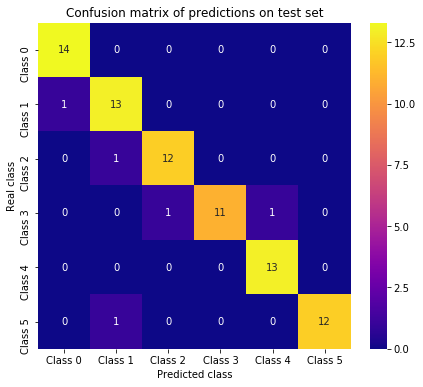

In [36]:
labels = ['Class {}'.format(i) for i in range(0, num_classes)]
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred),
            cmap='plasma', robust=True, annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion matrix of predictions on test set');
plt.xlabel('Predicted class')
plt.ylabel('Real class');